In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import sys
# have to do this for now, don't want to restart my jupyter server
sys.path.append(r'/home/zequnl/Installs/enlib') 

In [3]:
from __future__ import print_function
import numpy as np
from orphics import lensing,io,stats,cosmology,maps
import matplotlib.pyplot as plt 

We first generate some (units) spectra with orphics/pyCAMB.

Generating theory Cls...
Loaded cached Cls from  output/clsAll_low_acc_False_3000_20180726.pkl
Loaded cached Cls from  output/clphi_low_acc_False_3000_20180726.txt


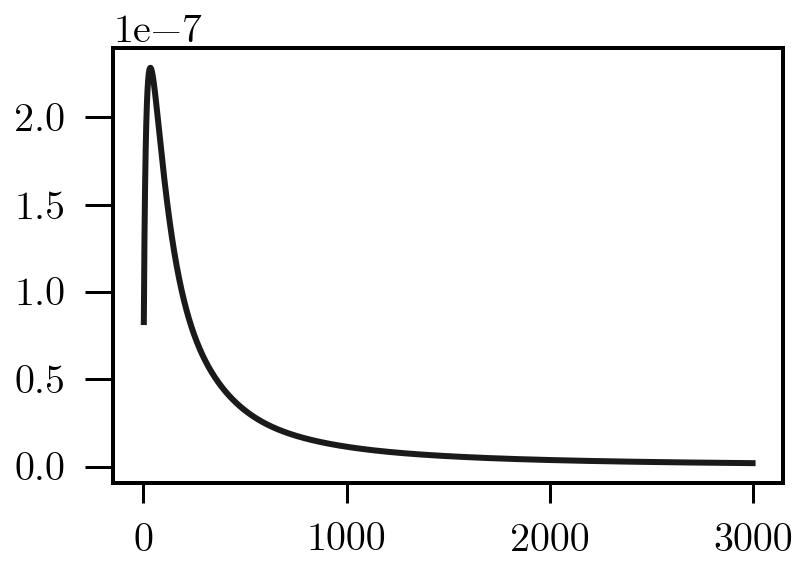

In [4]:
# Initialize cosmology and Clkk. Later parts need dimensionless spectra.# Initia 
lmax = 3000
cc = cosmology.Cosmology(lmax=lmax,pickling=True,dimensionless=False)
theory = cc.theory
ells = np.arange(2,lmax,1)
clkk = theory.gCl('kk',ells)

plt.plot(ells, clkk)

Next, we generate some (units) noise curves. 

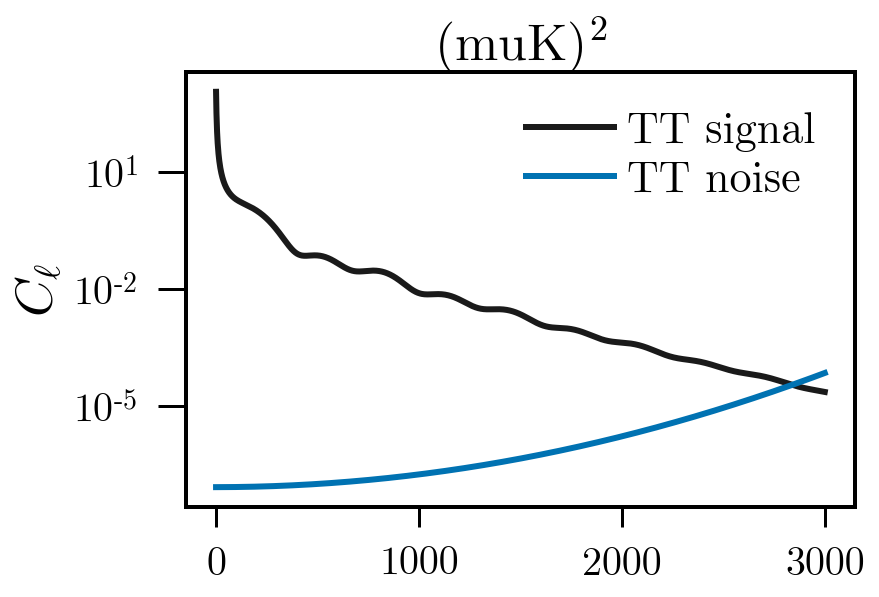

In [42]:
Tcmb = 2.726

sT = 1 * (np.pi/60./180.)
sP = sT * np.sqrt(2.)
theta_FWHM = 7. * (np.pi/60./180.)
muK = Tcmb*1.0e6
# unitless white noise
exp_term = np.exp(ells*(ells+1)*(theta_FWHM**2)/(8*np.log(2)))
NlTT = sT**2 * exp_term #/ muK**2
NlEE = sP**2 * exp_term #/ muK**2
NlBB = sP**2 * exp_term #/ muK**2

plt.plot(theory.lCl('tt',ells), label='TT signal')
plt.plot(NlTT, label='TT noise')
# plt.ylim(0,8e-9)
plt.yscale('log')
plt.ylabel('$C_{\ell}$')
plt.title('(muK)$^2$')
plt.legend()

In [43]:
# Define bin edges for noise curve
bin_edges = np.arange(2,lmax,80)
# Experiment parameters, here for Planck

kmin = 2
kmax = 3000
ls,nlkks,theory_,qest = lensing.lensing_noise(
    ells=ells,
    ntt=NlTT,
    nee=NlEE,
    nbb=NlBB,
    ellmin_t=2,ellmin_e=2,ellmin_b=2,
    ellmax_t=3000,ellmax_e=3000,ellmax_b=3000,
    bin_edges=bin_edges,
    estimators = ['TT','TE','EE','EB','TB'],
    ellmin_k = kmin,
    ellmax_k = kmax,
    theory=theory,
    dimensionless=False)

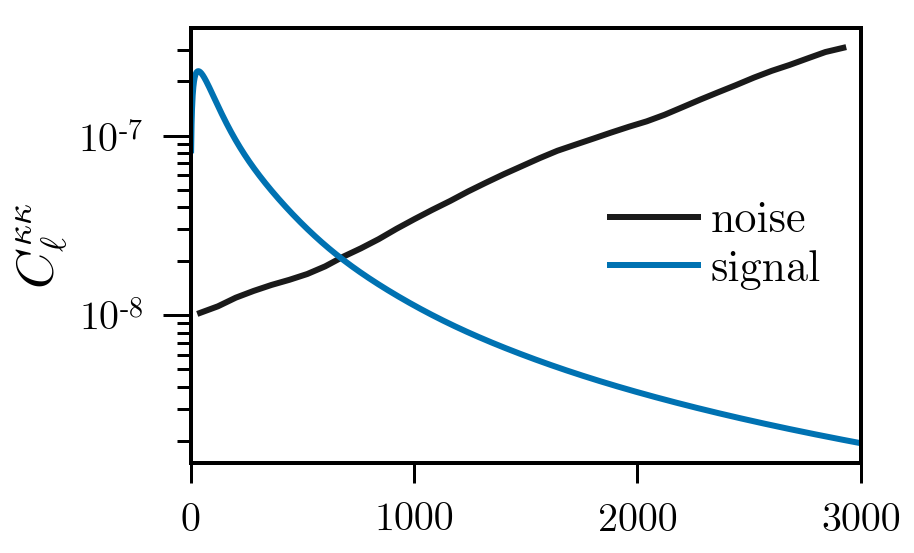

In [49]:
import matplotlib.pyplot as plt 
plt.plot(ls, nlkks['mv'], label='noise')
plt.plot(ells, clkk, label='signal')
plt.yscale('log')
# plt.xscale('log')
plt.legend()
# plt.ylim(5e-9,5e-4)
plt.xlim(2,3000)
plt.ylabel('$C_{\ell}^{\kappa\kappa}$');
plt.savefig('out.png', dpi=100)

In [47]:
for l, nl, in zip(ls, nlkks['mv']):
    print( l, nl )

42.0 1.02886566516913e-08
122.0 1.1194860550459957e-08
202.0 1.2505619136465732e-08
282.0 1.3639000292859354e-08
362.0 1.4726157985091727e-08
442.0 1.5725847204661933e-08
522.0 1.6938661270395064e-08
602.0 1.8682705809355073e-08
682.0 2.112299958392952e-08
762.0 2.3537204158565772e-08
842.0 2.6496287215049565e-08
922.0 3.025903245034381e-08
1002.0 3.4250486637297883e-08
1082.0 3.858609285601067e-08
1162.0 4.3227517165236133e-08
1242.0 4.881779318529917e-08
1322.0 5.4637529106849264e-08
1402.0 6.091794461679896e-08
1482.0 6.748938330785925e-08
1562.0 7.478835883220224e-08
1642.0 8.228241718672807e-08
1722.0 8.893682840859781e-08
1802.0 9.60522674909952e-08
1882.0 1.0384832218496256e-07
1962.0 1.1192068433016309e-07
2042.0 1.199852307972035e-07
2122.0 1.3053890509577023e-07
2202.0 1.43859054270254e-07
2282.0 1.5863511614121002e-07
2362.0 1.7420892487626716e-07
2442.0 1.9100543065917838e-07
2522.0 2.102343953615504e-07
2602.0 2.2934157407025104e-07
2682.0 2.4737779899712124e-07
2762.0 2.6